In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('encuesta_procesada.csv')

In [2]:
df

,Marca temporal,1.- Datos demográficos del cliente\n¿Qué edad tiene?:,2.- Género:,3.- ¿Qué nivel educativo tiene?,4.- ¿Cuántos miembros compone su familia?,5.- ¿Con qué frecuencia conduce?,6.- ¿Qué tipo de carreteras utiliza con más frecuencia?,7.- ¿Con qué frecuencia conduce por la noche?,8.- ¿Qué tan preocupado está por la seguridad de sus vehículos y activos?,9.- ¿Ha sido víctima de algún robo o hurto en los últimos 5 años?,...,14.- ¿Cómo Ud se enteró que existe el servicio de rastreo satelital?,15.- ¿Qué otras soluciones de seguridad utiliza en su vehículo?,16.- ¿Qué considera Ud. que necesita una aplicación móvil para rastrear vehículos y activos?,17.- ¿Qué tipo de beneficios busca al utilizar un servicio de rastreo satelital?,18.- ¿Ha recibido alguna vez alertas de seguridad o emergencias relacionadas con su ubicación?,19.- ¿Conoce Ud. el proceso para adquirir un servicio de rastreo satelital?,20.- ¿Prefiere comprar el rastreo satelital en efectivo o a crédito?,21.- ¿Ha tenido alguna vez problemas con el robo o la pérdida de sus vehículos?,22.- ¿Qué tan importante es para usted tener acceso a la información en tiempo real sobre la ubicación de sus vehículos o activos?,23.- ¿Qué empresas de rastreo satelital conoce?
0,2024/05/01 4:53:50 p. m. GMT-5,25 a 35 años,Femenino,Universitario,1-3 miembros,Diariamente,Autopistas,Nunca,Preocupado,No,...,Publicidad en redes sociales o plataformas dig...,Ninguna,GPS Tracker – Video tracking,Monitoreo en tiempo real,No,Si,Crédito,Si,Importartante,Rastreo 365
1,2024/05/01 4:54:51 p. m. GMT-5,25 a 35 años,Masculino,Posgrado,4-6 miembros,Diariamente,Calles urbanas,Diariamente,Neutral,No,...,Recomendación de un amigo o familiar,Sistemas de alarma,GPS Tracker – Video tracking,Protección de sus vehículos;Monitoreo en tiemp...,No,No,Crédito,No,Importartante,Rastreo365
2,2024/05/01 4:56:25 p. m. GMT-5,35 a 44 años,Femenino,Universitario,4-6 miembros,Nunca,Bus,Nunca,Neutral,No,...,Recomendación de un amigo o familiar,Sistemas de alarma,Imágenes en 3D,Protección de sus vehículos,No,Si,Efectivo,No,Importartante,Hunter
3,2024/05/01 5:00:05 p. m. GMT-5,45 a 54 años,Masculino,Universitario,1-3 miembros,Una vez a la semana,Calles urbanas,Nunca,Preocupado,No,...,Publicidad en redes sociales o plataformas dig...,Sistemas de alarma,GPS Tracker – Video tracking,Protección de sus vehículos,No,Si,Efectivo,No,Importartante,Rastreo 365
4,2024/05/01 5:00:08 p. m. GMT-5,45 a 54 años,Femenino,Técnico,4-6 miembros,Una vez a la semana,Caminos rurales,Diariamente,Neutral,No,...,Recomendación de un amigo o familiar,Sistemas de alarma,Compartir ubicación en tiempo real,Monitoreo en tiempo real,Si,No,Crédito,No,Importartante,No conozco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,2024/05/01 9:56:40 p. m. GMT-5,25 a 35 años,Masculino,Universitario,7 o más miembros,Varias veces a la semana,Bus,Ocasionalmente,Preocupado,No,...,Publicidad en redes sociales o plataformas dig...,Control de acceso automático y remoto;GPS inal...,Compartir ubicación en tiempo real,Monitoreo en tiempo real;Informes detallados,Si,No,Efectivo,No,Importartante,Ninguna
499,2024/05/01 9:20:32 p. m. GMT-5,25 a 35 años,Masculino,Posgrado,1-3 miembros,Varias veces a la semana,Calles urbanas,Ocasionalmente,Preocupado,No,...,Precisión de rastreo,Sistemas de alarma,GPS Tracker – Video tracking,Protección de sus vehículos;Monitoreo en tiemp...,Si,Si,Crédito,No,Importartante,Chevystar
500,2024/05/06 9:45:56 a. m. GMT-5,35 a 44 años,Masculino,Técnico,1-3 miembros,Diariamente,Bus,Ocasionalmente,Neutral,Si,...,Publicidad en redes sociales o plataformas dig...,Ninguna,GPS Tracker – Video tracking,Protección de sus vehículos;Monitoreo en tiemp...,No,No,Efectivo,No,Importartante,Ninguna
501,2024/05/01 7:33:26 p. m. GMT-5,35 a 44 años,Masculino,Universitario,4-6 miembros,Varias veces a la semana,Calles urbanas,Ocasionalmente,Preocupado,Si,...,Recomendación de un amigo o familiar,GPS inalámbrico independiente,Imágene

In [3]:
df = df.drop(df.columns[0], axis=1)

In [4]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Codificar variables categóricas
categorical_columns = df.select_dtypes(include=['object']).columns
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df[categorical_columns])

# Normalizar los datos
scaler = StandardScaler()
normalized_data = scaler.fit_transform(encoded_data.toarray())


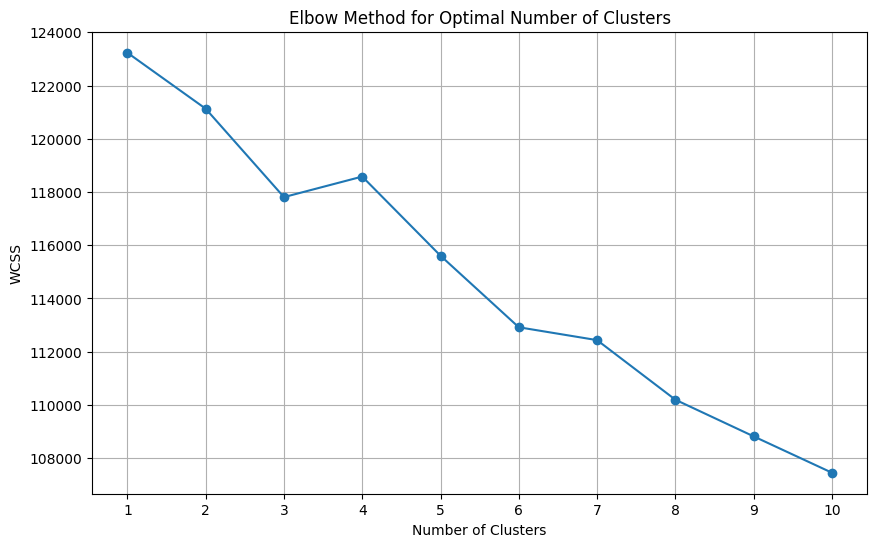

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=8)
    kmeans.fit(normalized_data)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


In [7]:
n_clusters=3

kmeans = KMeans(n_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(normalized_data)
df['Cluster'] = clusters

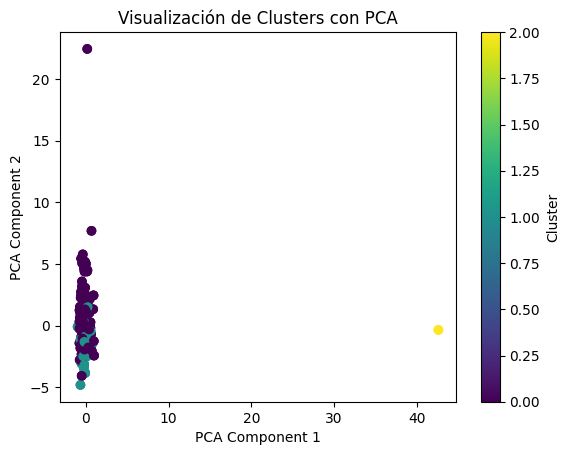

In [8]:
from sklearn.decomposition import PCA

# Reducir la dimensionalidad para visualización
pca = PCA(n_components=2)
pca_components = pca.fit_transform(normalized_data)

plt.scatter(pca_components[:, 0], pca_components[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Visualización de Clusters con PCA')
plt.colorbar(label='Cluster')
plt.show()

In [9]:
# Calcular la importancia de cada variable en cada cluster
numeric_columns = df.select_dtypes(include=[np.number]).columns
cluster_means = df.groupby('Cluster')[numeric_columns].mean()
overall_means = df[numeric_columns].mean()
importance = np.abs(cluster_means - overall_means)

In [11]:
# Calcular la frecuencia de cada valor dentro de cada cluster
for column in df.columns:
    if column != 'Cluster':
        value_counts = df.groupby(['Cluster', column])[column].count()
        print(f"Valores en '{column}':\n{value_counts}\n")


Valores en '1.- Datos demográficos del cliente
¿Qué edad tiene?:':
Cluster  1.- Datos demográficos del cliente\n¿Qué edad tiene?:
0        25 a 35 años                                              66
         35 a 44 años                                             129
         45 a 54 años                                             156
         55 a 64 años                                              19
         Mayor a 65 años                                            3
1        25 a 35 años                                              45
         35 a 44 años                                              60
         45 a 54 años                                              17
         55 a 64 años                                               6
2        35 a 44 años                                               2
Name: 1.- Datos demográficos del cliente\n¿Qué edad tiene?:, dtype: int64

Valores en '2.- Género:':
Cluster  2.- Género:
0        Femenino       117
         Masculino  

In [12]:
# Combinar información de importancia y frecuencia
for cluster in range(n_clusters):
    print(f"\nCluster {cluster}:")
    sorted_importance = importance.loc[cluster].sort_values(ascending=False)
    for variable in sorted_importance.index:
        print(f"Variable: {variable}, Importancia: {sorted_importance[variable]}")
        
        # Obtener los valores más relevantes para esa variable
        value_counts = df.groupby(['Cluster', variable])[variable].count().loc[cluster]
        most_frequent_values = value_counts.sort_values(ascending=False).index[:3]  # Top 3 valores más frecuentes
        
        print(f"Valores más relevantes: {most_frequent_values}")



Cluster 0:
Variable: Cluster, Importancia: 0.2624254473161034
Valores más relevantes: Index([0], dtype='int32', name='Cluster')

Cluster 1:
Variable: Cluster, Importancia: 0.7375745526838966
Valores más relevantes: Index([1], dtype='int32', name='Cluster')

Cluster 2:
Variable: Cluster, Importancia: 1.7375745526838966
Valores más relevantes: Index([2], dtype='int32', name='Cluster')


In [13]:
import numpy as np

# Analizar las características más relevantes de cada cluster
# Filtrar solo las columnas numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns
cluster_means = df.groupby('Cluster')[numeric_columns].mean()
print(cluster_means)


         Cluster
Cluster         
0            0.0
1            1.0
2            2.0


In [13]:
# Evaluar la importancia de las variables en cada cluster
for column in numeric_columns:
    cluster_means = df.groupby('Cluster')[column].mean()
    overall_mean = df[column].mean()
    relevance = np.abs(cluster_means - overall_mean)
    print(f'Variable: {column}, Relevancia: {relevance}')

Variable: Cluster, Relevancia: Cluster
0    1.00994
1    0.00994
2    0.99006
3    1.99006
Name: Cluster, dtype: float64
